# House Prices - Linear model

Welcome! Let's do some regression.

TOC:
1. [Problem Framing](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Prepare the Data](#t4.)
5. [Shortlisting Promising ML Models](#t5.)
6. [Fine-Tune the System](#t6.)
7. [Presenting the Solution](#t7.)

References:
    * https://www.kaggle.com/apapiu/regularized-linear-models
    * https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing

<a id="t1."></a>
## 1. Problem Framing

### Problem Definition

This is a standard supervised regression task. Whit 79 explanatory variables describing most aspects of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goals: 
* Do a comprehensive data analysis along with visualizations.
* Learn/review/explain different regression algorithms and its hyperparameters.
* Create models that are well equipped to predict better sale price of the the house.

### The Data

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

All the different variables come described at the file data_description.txt, said that, we have to have in mind that we need to focus on the target variable, which is SalePrice.

### Preparing the tools

In [1]:
#basic libraries
import sys
import numpy as np
import pandas as pd
import os
import warnings

#seed the project
np.random.seed(64)

#ploting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import missingno
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

print("Set up completed")

Set up completed


### Load the Data

In [2]:
# Import train and test data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
# Print the first rows of the training data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Print the first rows of the test data
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
print (f"Train has {train_df.shape[0]} rows and {train_df.shape[1]} columns")
print (f"Test has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


<a id="t2."></a>
## 2. Data Quality & Missing Values Assessment

### Data Types
We can see our dataset consist on different types of data. As we continue to analyze it, we'll find features which are numerical and should actually be categorial.

In [5]:
# Different data types in the dataset
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Missing Values

As you can see we have some missing data, let's have a look how many we have for each column at the train_df

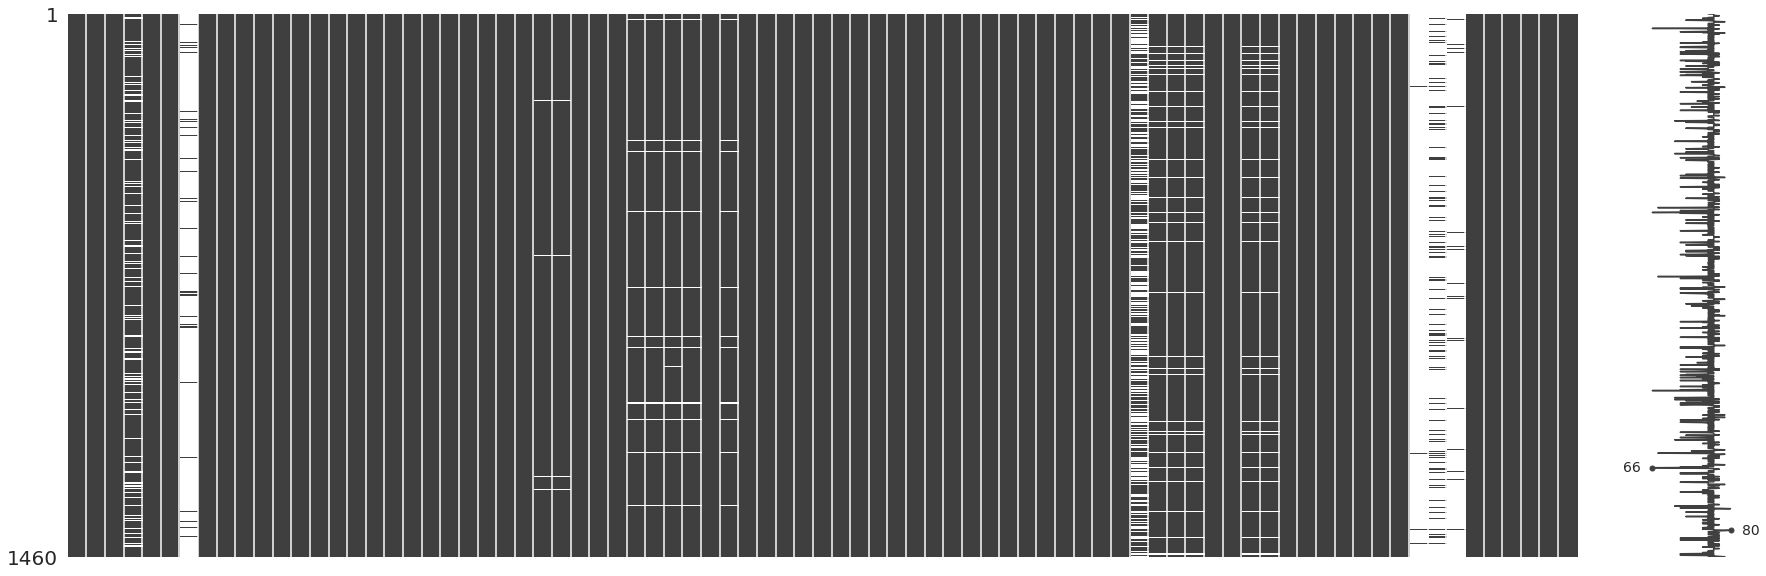

In [8]:
# Plot graphic of missing values
missingno.matrix(train_df, figsize = (30,10));

In [12]:
# We need to see the amount of missing values present in each column.
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train_df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


It is important to check which columns contain empty values, as most ML models don't work when these are present. In this case, we can see that there are some values with a great amount of missing values, such as PoolQc, MiscFeature, Alley, Fence and FireplaceQu. 

As we said, to be able to continue with our analysis we can't have any missing value, so what we will do is either not use the feature if the amount of missing values is too large or replace them by the most frequent value.

<a id="t2."></a>
## 3. Exploration Data Analysis

<a id="t4."></a>
## 4. Preparing the Data

<a id="t5."></a>
## 5. Shortlisting Promising ML Models

<a id="t6."></a>
## 6. Fine-Tune the Model

<a id="t7."></a>
## 7. Presenting the Solution